# Importação de Bibliotecas

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

# Leitura e Merge dos Dados

In [73]:
dfs = []

for ano in range(2016, 2021):
    df = pd.read_csv(f'Base Finais/{ano}_f.csv')
    df['ano'] = ano
    dfs.append(df)

dados = pd.concat(dfs, ignore_index=True)



# Análise Inicial dos Dados

In [74]:
dados.head()

,A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?,"A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?",A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?,A sua privacidade eh protegida se voce optar por um tratamento de saude mental oferecido pela sua empresa?,"Caso voce sinta a necessidade de solicitar uma licenca do trabalho devido a saude mental, quao facil ou dificil seria fazer essa solicitacao?",Voce se sentiria confortavel discutindo uma questao de saude mental com o seu chefe direto?,Voce se sentiria confortavel discutindo uma questao de saude mental com os seus pares?,O quao propenso voce estaria em dividir com amigos e familiares que voce possui uma doenca mental?,"Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?","Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?",Idade,Genero,Qual pais voce reside?,Qual pais voce trabalha?,Voce ja foi diagnosticado com uma doenca mental?,Voce ja procurou tratamento profissional para uma doenca mental?,ano
0,Nao elegivel,Nao,Nao,Eu nao sei,Muito Facil,Sim,Talvez,Um pouco aberto,NaN,NaN,39.0,Masculino,United Kingdom,United Kingdom,Sim,Nao,2016
1,Nao,Sim,Sim,Sim,Facil,Sim,Talvez,Um pouco aberto,NaN,NaN,29.0,masculino,United States,United States,Sim,Sim,2016
2,Nao,Nao,Nao,Eu nao sei,Nem facil nem dificil,Talvez,Talvez,Um pouco aberto,NaN,NaN,38.0,Masculino,United Kingdom,United Kingdom,Nao,Sim,2016
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutro,Nao tenho certeza,Nao tenho certeza,43.0,masculino,United Kingdom,United Kingdom,Sim,Sim,2016
4,Sim,Nao,Nao,Nao,Nem facil nem dificil,Nao,Talvez,Um pouco aberto,NaN,NaN,43.0,Feminino,United States,United States,Sim,Sim,2016


Os nomes das colunas são muito grandes e dificultam a visualização. Vamos usar o procedimento de criar um dicionário para essas perguntas.

In [75]:
chaves = ['Q{}'.format(i) for i in range(1,dados.shape[1]+1)]
dicionario_colunas = pd.Series(dados.columns,index=chaves)
dicionario_colunas

Q1                                                    A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q2                                   A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?
Q3                                            A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?
Q4                                        A sua privacidade eh protegida se voce optar por um tratamento de saude mental oferecido pela sua empresa?
Q5     Caso voce sinta a necessidade de solicitar uma licenca do trabalho devido a saude mental, quao facil ou dificil seria fazer essa solicitacao?
Q6                                                       Voce se sentiria confortavel discutindo uma questao de saude mental com o seu chefe direto?
Q7                                                            Voce se sentiria confortavel discutindo uma 

In [76]:
dados.columns = dicionario_colunas.index
dados.columns
dados.head() 

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,Nao elegivel,Nao,Nao,Eu nao sei,Muito Facil,Sim,Talvez,Um pouco aberto,NaN,NaN,39.0,Masculino,United Kingdom,United Kingdom,Sim,Nao,2016
1,Nao,Sim,Sim,Sim,Facil,Sim,Talvez,Um pouco aberto,NaN,NaN,29.0,masculino,United States,United States,Sim,Sim,2016
2,Nao,Nao,Nao,Eu nao sei,Nem facil nem dificil,Talvez,Talvez,Um pouco aberto,NaN,NaN,38.0,Masculino,United Kingdom,United Kingdom,Nao,Sim,2016
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutro,Nao tenho certeza,Nao tenho certeza,43.0,masculino,United Kingdom,United Kingdom,Sim,Sim,2016
4,Sim,Nao,Nao,Nao,Nem facil nem dificil,Nao,Talvez,Um pouco aberto,NaN,NaN,43.0,Feminino,United States,United States,Sim,Sim,2016


In [77]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      2315 non-null   object 
 1   Q2      2315 non-null   object 
 2   Q3      2315 non-null   object 
 3   Q4      2315 non-null   object 
 4   Q5      2315 non-null   object 
 5   Q6      2315 non-null   object 
 6   Q7      2315 non-null   object 
 7   Q8      2739 non-null   object 
 8   Q9      196 non-null    object 
 9   Q10     424 non-null    object 
 10  Q11     2739 non-null   float64
 11  Q12     2719 non-null   object 
 12  Q13     2739 non-null   object 
 13  Q14     2739 non-null   object 
 14  Q15     1927 non-null   object 
 15  Q16     2739 non-null   object 
 16  Q17     2739 non-null   int64  
dtypes: float64(1), int64(1), object(15)
memory usage: 363.9+ KB


In [78]:
for col in dados.columns:
    print(f'{col}: {dados[col].isnull().sum()} valores ausentes')

Q1: 424 valores ausentes
Q2: 424 valores ausentes
Q3: 424 valores ausentes
Q4: 424 valores ausentes
Q5: 424 valores ausentes
Q6: 424 valores ausentes
Q7: 424 valores ausentes
Q8: 0 valores ausentes
Q9: 2543 valores ausentes
Q10: 2315 valores ausentes
Q11: 0 valores ausentes
Q12: 20 valores ausentes
Q13: 0 valores ausentes
Q14: 0 valores ausentes
Q15: 812 valores ausentes
Q16: 0 valores ausentes
Q17: 0 valores ausentes


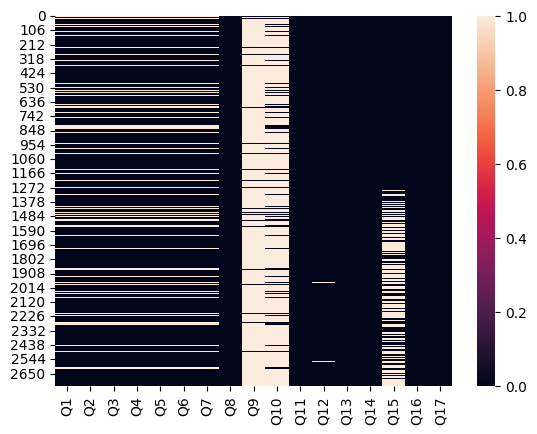

In [79]:
sns.heatmap(dados.isna())
plt.show()

# Limpeza dos Dados

Vemos os principais problemas nas colunas Q9, Q10 e Q15, além de várias linhas com dados faltantes de Q1 a Q7

In [86]:
print(dicionario_colunas.Q9)
print(dicionario_colunas.Q10)
print(dicionario_colunas.Q15)

Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?
Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?
Voce ja foi diagnosticado com uma doenca mental?


Percebe-se que as perguntas Q9 e Q10 tem muitos dados faltantes por serem perguntas que não se aplicam a todo mundo, apenas à "se você revelou uma doença mental".

## Coluna Q15

Vou tentar entender por que os dados Q15 têm essa quebra.

In [87]:
dados[dados.Q15.isna()].Q17.value_counts()

Q17
2017    314
2018    168
2019    136
2020     94
Name: count, dtype: int64

Em 2016 não temos nenhum dado faltante na coluna Q15, nos demais anos temos muitos

In [88]:
dados.Q15.value_counts()

Q15
Sim    1087
Nao     516
Name: count, dtype: int64

## Linhas Faltantes

In [89]:
dados[dados[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].isnull().any(axis=1)]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17


In [90]:
print(dicionario_colunas)

Q1                                                    A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q2                                   A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?
Q3                                            A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?
Q4                                        A sua privacidade eh protegida se voce optar por um tratamento de saude mental oferecido pela sua empresa?
Q5     Caso voce sinta a necessidade de solicitar uma licenca do trabalho devido a saude mental, quao facil ou dificil seria fazer essa solicitacao?
Q6                                                       Voce se sentiria confortavel discutindo uma questao de saude mental com o seu chefe direto?
Q7                                                            Voce se sentiria confortavel discutindo uma 

Como a Q1 será muito importante para a análise da Pergunta 5 proposta no Projeto, optei por excluir as linhas que não posuem essa resposta

In [91]:
dados.dropna(subset=['Q1'], inplace=True)

# Redução dos Dados

Vamos reduzir o banco para apenas as colunas relacionadas às nossas perguntas

In [92]:
dicionario_colunas

Q1                                                    A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q2                                   A sua empresa ja debateu saude mental formalmente (por exemplo, via um programa de concientizacao corporativo)?
Q3                                            A sua empresa oferece recursos para aprender mais sobre saude mental e alternativas para buscar ajuda?
Q4                                        A sua privacidade eh protegida se voce optar por um tratamento de saude mental oferecido pela sua empresa?
Q5     Caso voce sinta a necessidade de solicitar uma licenca do trabalho devido a saude mental, quao facil ou dificil seria fazer essa solicitacao?
Q6                                                       Voce se sentiria confortavel discutindo uma questao de saude mental com o seu chefe direto?
Q7                                                            Voce se sentiria confortavel discutindo uma 

As perguntas de Q2 a Q8 serão eliminadas

In [93]:
colunas_remover = dados.loc[:,'Q2':'Q8'].columns
dados_reduzidos = dados.drop(columns=colunas_remover)
dados_reduzidos.head()

,Q1,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,Nao elegivel,NaN,NaN,39.0,Masculino,United Kingdom,United Kingdom,Sim,Nao,2016
1,Nao,NaN,NaN,29.0,masculino,United States,United States,Sim,Sim,2016
2,Nao,NaN,NaN,38.0,Masculino,United Kingdom,United Kingdom,Nao,Sim,2016
4,Sim,NaN,NaN,43.0,Feminino,United States,United States,Sim,Sim,2016
5,Sim,NaN,NaN,42.0,Masculino,United Kingdom,United Kingdom,Nao,Sim,2016


In [94]:
dicionario_reduzido = dicionario_colunas[dados_reduzidos.columns]
dicionario_reduzido

Q1                            A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q9     Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?
Q10          Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?
Q11                                                                                                                    Idade
Q12                                                                                                                   Genero
Q13                                                                                                   Qual pais voce reside?
Q14                                                                                                 Qual pais voce trabalha?
Q15                                                                         Voce ja foi diagnosticado com uma doenca mental?


# Transformação de Dados

## Q1

In [95]:
print(dicionario_colunas.Q1)
print(dados_reduzidos.Q1.value_counts())
print(dados_reduzidos.Q1.isna().sum())

A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q1
Sim                  1276
Eu nao sei            624
Nao                   295
Nao elegivel           66
Nao elegivel - NA      54
Name: count, dtype: int64
0


In [96]:
mapeamento_q1 = {
    "Sim": "Sim",
    "Nao": "Não",
    "Eu nao sei": "Não sei",
    "Nao elegivel": "Não Aplica",
    "Nao elegivel - NA": "Não Aplica"
}

dados_reduzidos['Q1'] = dados_reduzidos['Q1'].replace(mapeamento_q1)

In [97]:
print(dicionario_colunas.Q1)
print(dados_reduzidos.Q1.value_counts())
print(dados_reduzidos.Q1.isna().sum())

A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q1
Sim           1276
Não sei        624
Não            295
Não Aplica     120
Name: count, dtype: int64
0


## Q9

In [98]:
print(f'Shape: {dados_reduzidos.shape}')
print(dicionario_colunas.Q9)
print(dados_reduzidos.Q9.value_counts())
print(dados_reduzidos.Q9.isna().sum())

Shape: (2315, 10)
Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?
Series([], Name: count, dtype: int64)
2315


In [99]:
dados_reduzidos.Q9 = dados_reduzidos.Q9.fillna('Não Aplica')
dados_reduzidos.Q9.value_counts()

Q9
Não Aplica    2315
Name: count, dtype: int64

## Q10

In [100]:
print(f'Shape: {dados_reduzidos.shape}')
print(dicionario_colunas.Q10)
print(dados_reduzidos.Q10.value_counts())
print(dados_reduzidos.Q10.isna().sum())

Shape: (2315, 10)
Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?
Series([], Name: count, dtype: int64)
2315


In [101]:
dados_reduzidos.Q10 = dados_reduzidos.Q10.fillna('Não Aplica')
dados_reduzidos.Q10.value_counts()

Q10
Não Aplica    2315
Name: count, dtype: int64

## Q11

In [102]:
print(f'Shape: {dados_reduzidos.shape}')
print(dicionario_colunas.Q11)
print(dados_reduzidos.Q11.value_counts())
print(dados_reduzidos.Q11.isna().sum())

Shape: (2315, 10)
Idade
Q11
30.0     149
28.0     129
32.0     125
35.0     112
37.0     109
29.0     108
31.0     107
27.0     106
34.0     105
33.0      98
26.0      96
39.0      86
36.0      81
38.0      78
40.0      76
42.0      72
25.0      71
24.0      67
41.0      52
44.0      50
45.0      50
22.0      48
23.0      48
43.0      34
46.0      34
47.0      30
49.0      25
21.0      22
48.0      17
50.0      15
51.0      13
52.0      13
55.0      12
53.0      11
20.0      10
54.0       7
57.0       7
19.0       7
61.0       5
62.0       4
56.0       4
63.0       3
59.0       3
66.0       2
60.0       2
58.0       2
3.0        1
17.0       1
323.0      1
74.0       1
70.0       1
18.0       1
64.0       1
99.0       1
65.0       1
0.0        1
Name: count, dtype: int64
0


Não temos dados faltantes, mas tem um dado com idade 0. Vamos substituir esse numero pela média

In [103]:
media_idade = dados_reduzidos[dados_reduzidos['Q11'] != 0]['Q11'].mean().round(0)
media_idade

np.float64(34.0)

In [104]:
dados_reduzidos.Q11 = dados_reduzidos.Q11.replace(0, media_idade)
dados_reduzidos = dados_reduzidos[(dados_reduzidos.Q11 >= 16)&(dados_reduzidos.Q11 <= 80)]

dados_reduzidos.Q11.value_counts().sort_index()

Q11
17.0      1
18.0      1
19.0      7
20.0     10
21.0     22
22.0     48
23.0     48
24.0     67
25.0     71
26.0     96
27.0    106
28.0    129
29.0    108
30.0    149
31.0    107
32.0    125
33.0     98
34.0    106
35.0    112
36.0     81
37.0    109
38.0     78
39.0     86
40.0     76
41.0     52
42.0     72
43.0     34
44.0     50
45.0     50
46.0     34
47.0     30
48.0     17
49.0     25
50.0     15
51.0     13
52.0     13
53.0     11
54.0      7
55.0     12
56.0      4
57.0      7
58.0      2
59.0      3
60.0      2
61.0      5
62.0      4
63.0      3
64.0      1
65.0      1
66.0      2
70.0      1
74.0      1
Name: count, dtype: int64

## Q12

In [105]:
print(f'Shape: {dados_reduzidos.shape}')
print(dicionario_colunas.Q12)
print(dados_reduzidos.Q12.value_counts())
print(dados_reduzidos.Q12.isna().sum())

Shape: (2312, 10)
Genero
Q12
Masculino                                 978
masculino                                 340
Feminino                                  318
feminino                                  181
M                                         117
m                                          79
F                                          58
f                                          41
cisgênero masculino                        22
cisgênero feminino                         15
Masculino                                  14
Feminino                                   13
Mulher                                     11
queer                                      10
não binário                                10
mulher                                      8
Homem                                       7
outros                                      6
não-binário                                 6
Transgênero                                 6
sem gênero                                  5
Outro

In [106]:
def padronizar_genero(valor):
    valor = str(valor).strip().lower()
    
    if valor in ['masculino', 'm', 'male', 'cisgênero masculino', 'masculine', 'homem', 'homem cis','Homem']:
        return 'Masculino'
    elif valor in ['feminino', 'f', 'female', 'cisgênero mulher', 'feminina', 'mulher', 'mulher cis','Mulher']:
        return 'Feminino'
    else:
        return 'Outro'


In [107]:
dados_reduzidos['Q12'] = dados_reduzidos['Q12'].apply(padronizar_genero)
dados_reduzidos['Q12'].value_counts()

Q12
Masculino    1561
Feminino      635
Outro         116
Name: count, dtype: int64

## Q13

In [108]:
print(f'Shape: {dados_reduzidos.shape}')
print(dicionario_colunas.Q13)
print(dados_reduzidos.Q13.value_counts())
print(dados_reduzidos.Q13.isna().sum())

Shape: (2312, 10)
Qual pais voce reside?
Q13
United States     1684
United Kingdom     233
Canada             103
Germany             75
India               63
Netherlands         51
Australia           40
France              33
Brazil              30
Name: count, dtype: int64
0


## Q14

In [109]:
print(f'Shape: {dados_reduzidos.shape}')
print(dicionario_colunas.Q14)
print(dados_reduzidos.Q14.value_counts())
print(dados_reduzidos.Q14.isna().sum())

Shape: (2312, 10)
Qual pais voce trabalha?
Q14
United States     1684
United Kingdom     233
Canada             103
Germany             75
India               63
Netherlands         51
Australia           40
France              33
Brazil              30
Name: count, dtype: int64
0


## Q15

In [110]:
print(f'Shape: {dados_reduzidos.shape}')
print(dicionario_colunas.Q15)
print(dados_reduzidos.Q15.value_counts())
print(dados_reduzidos.Q15.isna().sum())

Shape: (2312, 10)
Voce ja foi diagnosticado com uma doenca mental?
Q15
Sim    1085
Nao     515
Name: count, dtype: int64
712


Assumimos que os valores nulos indicam ausência de diagnóstico, uma vez que quem foi diagnosticado provavelmente respondeu conscientemente 'Sim'. Portanto, substituímos os nulos por 'Não' para preservar consistência e aumentar a base de dados utilizável.

In [111]:
dados_reduzidos['Q15'] = dados_reduzidos['Q15'].fillna('Não')
dados_reduzidos.Q15 = dados_reduzidos.Q15.replace('Nao', 'Não')
dados_reduzidos.Q15.value_counts()


Q15
Não    1227
Sim    1085
Name: count, dtype: int64

## Q16

In [112]:
print(f'Shape: {dados_reduzidos.shape}')
print(dicionario_colunas.Q16)
print(dados_reduzidos.Q16.value_counts())
print(dados_reduzidos.Q16.isna().sum())

Shape: (2312, 10)
Voce ja procurou tratamento profissional para uma doenca mental?
Q16
Sim    1414
Nao     898
Name: count, dtype: int64
0


In [113]:
dados_reduzidos.Q16 = dados_reduzidos.Q16.replace('Nao', 'Não')
print(dados_reduzidos.Q16.value_counts())

Q16
Sim    1414
Não     898
Name: count, dtype: int64


## Q17

In [114]:
print(f'Shape: {dados_reduzidos.shape}')
print(dicionario_colunas.Q17)
print(dados_reduzidos.Q17.value_counts())
print(dados_reduzidos.Q17.isna().sum())

Shape: (2312, 10)
ano
Q17
2016    1031
2017     578
2018     326
2019     254
2020     123
Name: count, dtype: int64
0


# Consolidando Dados

In [115]:
df = dados_reduzidos
dic = dicionario_reduzido

# Respondendo Perguntas

In [40]:
dic

Q1                            A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q9     Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?
Q10          Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?
Q11                                                                                                                    Idade
Q12                                                                                                                   Genero
Q13                                                                                                   Qual pais voce reside?
Q14                                                                                                 Qual pais voce trabalha?
Q15                                                                         Voce ja foi diagnosticado com uma doenca mental?


## P1: Existe uma diferença significativa de saúde mental entre os gêneros de colaboradores ao longo do tempo em que a pesquisa foi realizada?

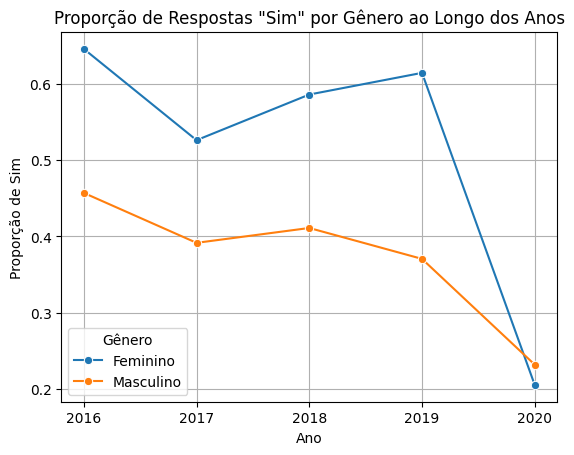

In [41]:
dados = []

for ano in range(2016, 2021):
    df_valido = df[(df.Q17 == ano) & (df.Q15.isin(['Sim', 'Não'])) & (df.Q12.isin(['Feminino', 'Masculino']))]
    contagem_df = df_valido.groupby('Q12')['Q15'].value_counts().unstack()
    proporcao_sim = contagem_df['Sim'] / contagem_df.sum(axis=1)
    proporcao_sim = proporcao_sim.reset_index()
    proporcao_sim['ano'] = ano
    proporcao_sim.columns = ['Gênero', 'Proporção de Sim', 'Ano']
    dados.append(proporcao_sim)
dados = pd.concat(dados, ignore_index=True)
serie_feminino = dados[dados['Gênero'] == 'Feminino']
serie_masculino = dados[dados['Gênero'] == 'Masculino']
# plt.figure(figsize=(12, 6))
sns.lineplot(data=serie_feminino, x='Ano', y='Proporção de Sim', label='Feminino', marker='o')
sns.lineplot(data=serie_masculino, x='Ano', y='Proporção de Sim', label='Masculino', marker='o')
plt.title('Proporção de Respostas "Sim" por Gênero ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Proporção de Sim')
plt.legend(title='Gênero')
plt.xticks(serie_feminino['Ano'].unique())
plt.grid(True)
plt.show()


Observa-se que há claramente uma diferença na proporção de colaboradores que já foram diagnosticados com alguma doença mental entre o gênero masculino e o feminino, onde há uma presença maior de respostas positivas no público feminino.

Além disso, nota-se que há uma tendência de crescimento entre 2017 e 2019 para o gênero feminino enquanto para o gênero masculino a tendência parece ser constante, ou até mesmo uma redução de respostas "Sim".

## P2: Existe uma diferença significativa de quem busca tratamento entre os gêneros de colaboradores ao longo do tempo em que a pesquisa foi realizada?

In [42]:
dic

Q1                            A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q9     Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?
Q10          Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?
Q11                                                                                                                    Idade
Q12                                                                                                                   Genero
Q13                                                                                                   Qual pais voce reside?
Q14                                                                                                 Qual pais voce trabalha?
Q15                                                                         Voce ja foi diagnosticado com uma doenca mental?


In [43]:
df.head()

,Q1,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,Não Aplica,Não Aplica,Não Aplica,39.0,Masculino,United Kingdom,United Kingdom,Sim,Não,2016
1,Não,Não Aplica,Não Aplica,29.0,Masculino,United States,United States,Sim,Sim,2016
2,Não,Não Aplica,Não Aplica,38.0,Masculino,United Kingdom,United Kingdom,Não,Sim,2016
4,Sim,Não Aplica,Não Aplica,43.0,Feminino,United States,United States,Sim,Sim,2016
5,Sim,Não Aplica,Não Aplica,42.0,Masculino,United Kingdom,United Kingdom,Não,Sim,2016


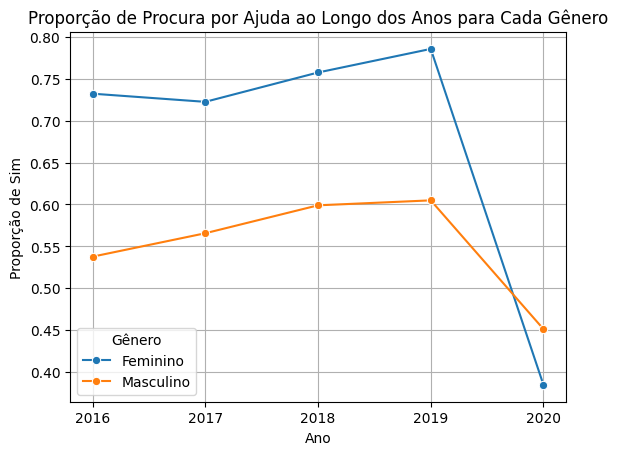

In [44]:
dados = []

for ano in range(2016, 2021):
    df_valido = df[(df.Q17 == ano) & (df.Q16.isin(['Sim', 'Não'])) & (df.Q12.isin(['Feminino', 'Masculino']))]
    contagem_df = df_valido.groupby('Q12')['Q16'].value_counts().unstack()
    proporcao_sim = contagem_df['Sim'] / contagem_df.sum(axis=1)
    proporcao_sim = proporcao_sim.reset_index()
    proporcao_sim['ano'] = ano
    proporcao_sim.columns = ['Gênero', 'Proporção de Sim', 'Ano']
    dados.append(proporcao_sim)
dados = pd.concat(dados, ignore_index=True)
serie_feminino = dados[dados['Gênero'] == 'Feminino']
serie_masculino = dados[dados['Gênero'] == 'Masculino']
sns.lineplot(data=serie_feminino, x='Ano', y='Proporção de Sim', label='Feminino', marker='o')
sns.lineplot(data=serie_masculino, x='Ano', y='Proporção de Sim', label='Masculino', marker='o')
plt.title('Proporção de Procura por Ajuda ao Longo dos Anos para Cada Gênero')
plt.xlabel('Ano')
plt.ylabel('Proporção de Sim')
plt.legend(title='Gênero')
plt.xticks(serie_feminino['Ano'].unique())
plt.grid(True)
plt.show()


Através do gráfico, pode-se notar que há um aumento na procura por tratamento profissional para ambos os gêneros. Também observa-se que há mais procura entre o público feminino do que entre o público masculino. 

## P3: Existe uma diferença significativa de saúde mental entre as idades dos colaboradores ao longo do tempo em que a pesquisa foi realizada?

In [45]:
dic

Q1                            A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q9     Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?
Q10          Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?
Q11                                                                                                                    Idade
Q12                                                                                                                   Genero
Q13                                                                                                   Qual pais voce reside?
Q14                                                                                                 Qual pais voce trabalha?
Q15                                                                         Voce ja foi diagnosticado com uma doenca mental?


<Axes: xlabel='Idade', ylabel='Proporção de Sim'>

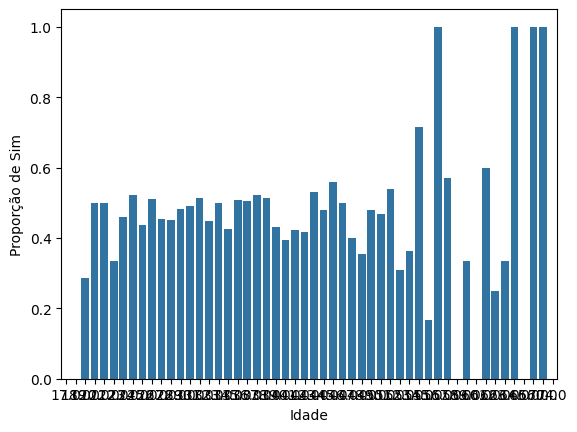

In [46]:
contagem_df = df.groupby('Q11')['Q15'].value_counts().unstack().fillna(0)
proporcao_sim = contagem_df['Sim'] / contagem_df.sum(axis=1)
proporcao_sim = proporcao_sim.reset_index()
proporcao_sim.columns = ['Idade', 'Proporção de Sim']

sns.barplot(data=proporcao_sim, x='Idade', y='Proporção de Sim')

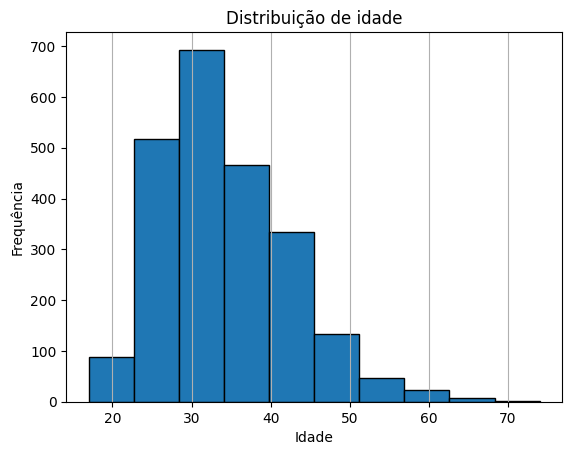

In [47]:
df['Q11'].hist(bins=10, edgecolor='black')
plt.title('Distribuição de idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()



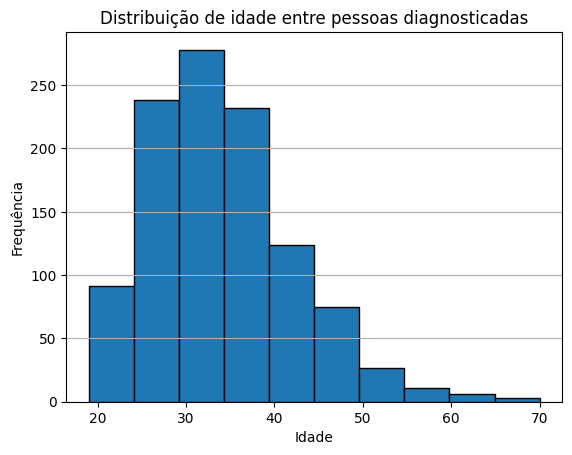

In [48]:
df[df['Q15'] == 'Sim']['Q11'].plot.hist(bins=10, edgecolor='black')
plt.title('Distribuição de idade entre pessoas diagnosticadas')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()


/var/folders/q2/yns_t6qs1rj_8b_hj6y1t8z80000gn/T/ipykernel_2925/3838740007.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_df = df[df['Q15'].isin(['Sim', 'Não'])].groupby('faixa_etaria')['Q15'].value_counts().unstack().fillna(0)


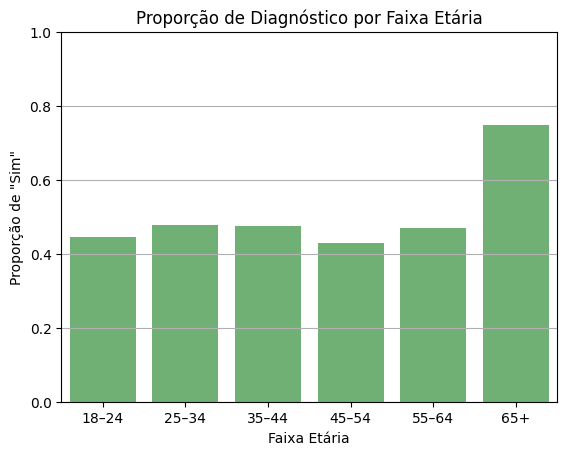

In [49]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']
df['faixa_etaria'] = pd.cut(df['Q11'], bins=bins, labels=labels)


contagem_df = df[df['Q15'].isin(['Sim', 'Não'])].groupby('faixa_etaria')['Q15'].value_counts().unstack().fillna(0)
proporcao_sim = contagem_df['Sim'] / contagem_df.sum(axis=1)
proporcao_sim = proporcao_sim.reset_index()
proporcao_sim.columns = ['Faixa Etária', 'Proporção de Sim']


sns.barplot(data=proporcao_sim, x='Faixa Etária', y='Proporção de Sim', color='#66bb6a')
plt.title('Proporção de Diagnóstico por Faixa Etária')
plt.ylim(0, 1)
plt.ylabel('Proporção de "Sim"')
plt.xlabel('Faixa Etária')
plt.grid(axis='y')
plt.show()

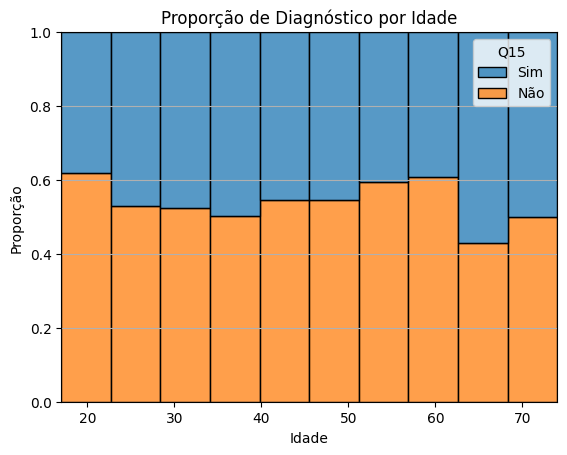

In [50]:
import seaborn as sns

sns.histplot(data=df[df['Q15'].isin(['Sim', 'Não'])], x='Q11', hue='Q15', bins=10, multiple='fill')
plt.title('Proporção de Diagnóstico por Idade')
plt.xlabel('Idade')
plt.ylabel('Proporção')
plt.grid(axis='y')
plt.show()


Fiz alguns gráficos para tentar entender o comportamento dos respondentes. É possível ver que temos uma densidade de respondentes "Sim" para a pergunta Q15 na idade entre 25-45 anos, porém essa também é a faixa etária com quantidade de respondentes e é esperado que tenha mais quantidade de "Sim".

Para contornar isso, pensei em usar novamente a proporção de "Sim" em comparação com o número de pessoas em cada faixa etária. Neste caso, observa-se que temos uma constante entre 50-60% de respostas "Sim", com um pico maior para as idades 65+, com porcentagem chegando quase em 80%.

## P4: Existe uma diferença significativa de quem busca tratamento entre as idades dos colaboradores ao longo do tempo em que a pesquisa foi realizada?

/var/folders/q2/yns_t6qs1rj_8b_hj6y1t8z80000gn/T/ipykernel_2925/4126159694.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_df = df[df['Q16'].isin(['Sim', 'Não'])].groupby('faixa_etaria')['Q16'].value_counts().unstack().fillna(0)


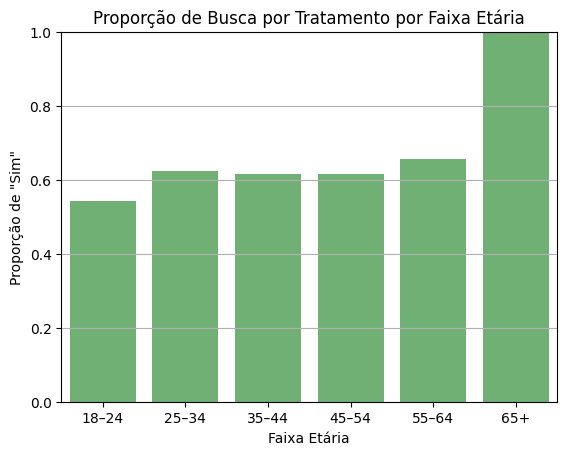

In [51]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65+']
df['faixa_etaria'] = pd.cut(df['Q11'], bins=bins, labels=labels)


contagem_df = df[df['Q16'].isin(['Sim', 'Não'])].groupby('faixa_etaria')['Q16'].value_counts().unstack().fillna(0)
proporcao_sim = contagem_df['Sim'] / contagem_df.sum(axis=1)
proporcao_sim = proporcao_sim.reset_index()
proporcao_sim.columns = ['Faixa Etária', 'Proporção de Sim']


sns.barplot(data=proporcao_sim, x='Faixa Etária', y='Proporção de Sim', color='#66bb6a')
plt.title('Proporção de Busca por Tratamento por Faixa Etária')
plt.ylim(0, 1)
plt.ylabel('Proporção de "Sim"')
plt.xlabel('Faixa Etária')
plt.grid(axis='y')
plt.show()

O gráfico resultante mostra que há diferenças claras entre as faixas etárias:

Faixas mais jovens (18–34) apresentam proporções mais baixas de busca por tratamento.

A tendência é de aumento gradual na proporção de respostas "Sim" conforme a idade avança, com destaque para os grupos de 55–64 e 65+, que apresentam as maiores proporções.

Isso pode indicar que pessoas mais velhas tendem a buscar mais tratamento ou que se sentem mais confortáveis para relatar isso na pesquisa.

## P5: Os funcionários de empresas que possuem benefícios de saúde para tratamento de saúde mental buscam mais tratamento?

In [53]:
dic

Q1                            A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q9     Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?
Q10          Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?
Q11                                                                                                                    Idade
Q12                                                                                                                   Genero
Q13                                                                                                   Qual pais voce reside?
Q14                                                                                                 Qual pais voce trabalha?
Q15                                                                         Voce ja foi diagnosticado com uma doenca mental?


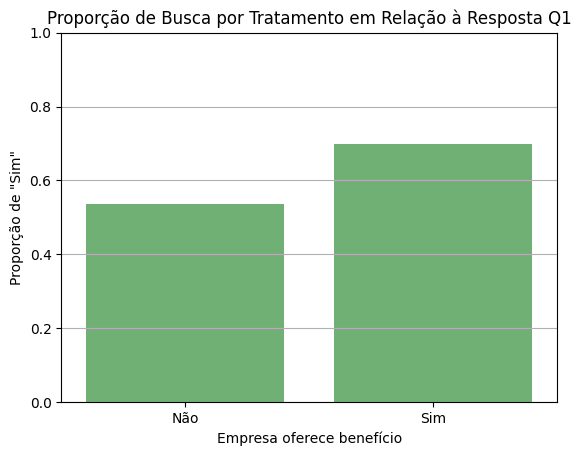

In [67]:
df_valido = df[(df.Q1.isin(['Sim', 'Não']))]
df_valido = df_valido.groupby('Q1')['Q16'].value_counts().unstack().fillna(0)
proporcao_sim = df_valido['Sim'] / df_valido.sum(axis=1)
proporcao_sim = proporcao_sim.reset_index()
proporcao_sim.columns = ['Resposta Q1', 'Proporção de Sim']
sns.barplot(data=proporcao_sim, x='Resposta Q1', y='Proporção de Sim', color='#66bb6a')
plt.title('Proporção de Busca por Tratamento em Relação à Resposta Q1')
plt.ylim(0, 1)
plt.ylabel('Proporção de "Sim"')
plt.xlabel('Empresa oferece benefício')
plt.grid(axis='y')
plt.show()

Os dados indicam que colaboradores cujas empresas oferecem benefícios voltados à saúde mental têm uma probabilidade significativamente maior de buscar tratamento profissional.

Aproximadamente 70% dos funcionários com acesso a esses benefícios afirmaram ter buscado tratamento, em contraste com apenas 53% daqueles cujas empresas não oferecem esse tipo de suporte.

## P6: Existe uma diferença significativa de saúde mental entre países mais ricos (com um PIB elevado) no ano de 2016? 

In [121]:
dic

Q1                            A sua empresa oferece beneficios referentes a saude mental como parte dos beneficios de saude?
Q9     Se voce revelou uma doenca mental para um cliente ou contato de negocio, como isso afetou voce e/ou o relacionamento?
Q10          Se voce revelou uma doenca mental para um para par ou funcionario, como isso afetou voce e/ou o relacionamento?
Q11                                                                                                                    Idade
Q12                                                                                                                   Genero
Q13                                                                                                   Qual pais voce reside?
Q14                                                                                                 Qual pais voce trabalha?
Q15                                                                         Voce ja foi diagnosticado com uma doenca mental?


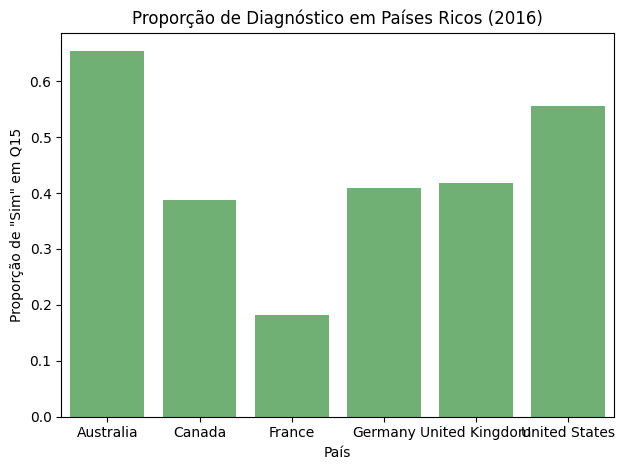

In [126]:
df_2016 = df[(df['Q17'] == 2016) & df['Q15'].isin(['Sim', 'Não'])]
paises_ricos = ['United States', 'Germany', 'United Kingdom', 'Canada', 'Australia', 'France']
df_ricos = df_2016[df_2016['Q13'].isin(paises_ricos)]
contagem = df_ricos.groupby('Q13')['Q15'].value_counts().unstack().fillna(0)
proporcao_sim = contagem['Sim'] / contagem.sum(axis=1)
sns.barplot(x=proporcao_sim.index, y=proporcao_sim.values, color='#66bb6a')
plt.title('Proporção de Diagnóstico em Países Ricos (2016)')
plt.xlabel('País')
plt.ylabel('Proporção de "Sim" em Q15')
plt.tight_layout()
plt.show()

Os dados demonstram uma diferença significativa entre os países de maior PIB no que diz respeito ao diagnóstico de doenças mentais em 2016.
Enquanto países como a França apresentaram uma proporção inferior a 20% de diagnósticos entre os respondentes, na Austrália esse número superou 60%, evidenciando uma disparidade marcante.